In [1]:
from pulp import *
import pandas as pd

# Basics of PuLP Modeling

In [2]:
model = LpProblem("Maximum Bakery Profit", LpMaximize)
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')

In [3]:
# Objective Function
model += 20 * A + 40 * B

In [4]:
# Subject to
model += 0.5 * A + 1 * B <= 30
model += 1 * A + 2.5 * B <= 60
model += 1 * A + 2 * B <= 22

In [5]:
model.solve()

1

In [6]:
print("Produce {} Cake A".format(A.varValue))
print("Produce {} Cake B".format(B.varValue))

Produce 0.0 Cake A
Produce 11.0 Cake B


# Example 1

    Simple resource scheduling exercise
       In this exercise you are planning the production at a glass manufacturer. This manufacturer only produces wine and beer glasses:

    there is a maximum production capacity of 60 hours
        each batch of wine and beer glasses takes 6 and 5 hours respectively
    the warehouse has a maximum capacity of 150 rack spaces
        each batch of the wine and beer glasses takes 10 and 20 spaces respectively
    the production equipment can only make full batches, no partial batches
    
    Also, we only have orders for 6 batches of wine glasses. 
    Therefore, we do not want to produce more than this. 
    Each batch of the wine glasses earns a profit of $5 and the beer $4.5.

    The objective is to maximize the profit for the manufacturer.

    puLP has already been imported for you.

In [7]:
# Initialize Class
model = LpProblem("Maximize Glass Co. Profits", LpMaximize)

# Define Decision Variables
wine = LpVariable('Wine', lowBound=0, upBound=None, cat='Integer')
beer = LpVariable('Beer', lowBound=0, upBound=None, cat='Integer')

# Define Objective Function
model += 5 * wine + 4.5 * beer

# Define Constraints
model += 6 * wine + 5 * beer <= 60
model += 10 * wine + 20 * beer <= 150
model += wine <= 6

# Solve Model
model.solve()
print("Produce {} batches of wine glasses".format(wine.varValue))
print("Produce {} batches of beer glasses".format(beer.varValue))

Produce 6.0 batches of wine glasses
Produce 4.0 batches of beer glasses


# Using lpSum

In [8]:
A = LpVariable('A', lowBound=0, cat='Integer')
B = LpVariable('B', lowBound=0, cat='Integer')
C = LpVariable('C', lowBound=0, cat='Integer')
D = LpVariable('D', lowBound=0, cat='Integer')
E = LpVariable('E', lowBound=0, cat='Integer')
F = LpVariable('F', lowBound=0, cat='Integer')

In [9]:
var_list = [20*A, 40*B, 33*C, 14*D, 6*E, 60*F]
model += lpSum(var_list)

C:\Users\hungu\anaconda.x\lib\site-packages\pulp\pulp.py:1348: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [10]:
cake_types = ["A","B","C","D","E","F"]
profit_by_cake = {'A': 20,'B':40, 'C':33,'D':14,'E':6,'F':60}
var_dict = {'A': A,'B':B, 'C':C,'D':D,'E':E,'F':F}

model += lpSum([profit_by_cake[type] * var_dict[type] 
               for type in cake_types ])

# Example 

    In this exercise you are making two types (premium and budget) of ice cream, using heavy cream, whole milk, and sugar. One version is a premium version containing more cream than your budget version. You are looking to find the mixture of ingredients that minimizes the total costs of ingredients.

    Ingredient	$/cup
    Cream	$1.5
    Milk	$0.125
    Sugar	$0.10
    
    Two Python lists called prod_type and ingredient have been created for you, along with a dictionary var_dict containing the decision variables of the model. You can explore them in the console.

In [11]:
# Define Objective Function
cb = LpVariable('cb', lowBound=0, cat='Integer')
mb = LpVariable('mb', lowBound=0, cat='Integer')
sb = LpVariable('sb', lowBound=0, cat='Integer')
cp = LpVariable('cp', lowBound=0, cat='Integer')
mp = LpVariable('mp', lowBound=0, cat='Integer')
sp = LpVariable('sp', lowBound=0, cat='Integer')

var_dict = {('budget', 'cream'): cb,
 ('budget', 'milk'): mb,
 ('budget', 'sugar'): sb,
 ('premium', 'cream'): cp,
 ('premium', 'milk'): mp,
 ('premium', 'sugar'): sp}

prod_type = ['premium','budget']
ingredient = ['cream', 'milk', 'sugar']

model += lpSum([1.5 * var_dict[(i, 'cream')] 
                + 0.125 * var_dict[(i, 'milk')] 
                + 0.10 * var_dict[(i, 'sugar')]
                
                # Iterate over product types
                for i in prod_type])

# Example

    You are consulting for kitchen oven manufacturer helping to plan their logistics for next month. There are two warehouse locations (New York, and Atlanta), and four regional customer locations (East, South, Midwest, West). The expected demand next month for East it is 1,800, for South it is 1,200, for the Midwest it is 1,100, and for West it is 1000. The cost for shipping each of the warehouse locations to the regional customer's is listed in the table below. Your goal is to fulfill the regional demand at the lowest price.

    Customer	New York	Atlanta
        East	$211	$232
        South	$232	$212
        Midwest	$240	$230
        West	$300	$280
       
       Two Python dictionaries costs and var_dict have been created for you containing the costs and decision variables of the model. You can explore them in the console.

In [12]:
atle = LpVariable('cb', lowBound=0, cat='Integer')
atlm = LpVariable('mb', lowBound=0, cat='Integer')
atls = LpVariable('sb', lowBound=0, cat='Integer')
atlw = LpVariable('cp', lowBound=0, cat='Integer')
ne = LpVariable('cb', lowBound=0, cat='Integer')
nm = LpVariable('mb', lowBound=0, cat='Integer')
ns = LpVariable('sb', lowBound=0, cat='Integer')
nw = LpVariable('cp', lowBound=0, cat='Integer')

costs = {('Atlanta', 'East'): 232,
 ('Atlanta', 'Midwest'): 230,
 ('Atlanta', 'South'): 212,
 ('Atlanta', 'West'): 280,
 ('New York', 'East'): 211,
 ('New York', 'Midwest'): 240,
 ('New York', 'South'): 232,
 ('New York', 'West'): 300}

var_dict = {('Atlanta', 'East'): atle,
 ('Atlanta', 'Midwest'): atlm,
 ('Atlanta', 'South'): atls,
 ('Atlanta', 'West'): atlw,
 ('New York', 'East'): ne,
 ('New York', 'Midwest'): nm,
 ('New York', 'South'): ns,
 ('New York', 'West'): nw}

model = LpProblem("Minimize Transportation Costs", LpMinimize)

# Build the lists and the demand dictionary
warehouse = ['New York', 'Atlanta']
customers = ['East', 'South', 'Midwest', 'West']
regional_demand = [1800, 1200, 1100, 1000]
demand = dict(zip(customers, regional_demand))

# Define Objective
model += lpSum([costs[(w, c)] * var_dict[(w, c)] 
                for c in customers for w in warehouse])

# For each customer, sum warehouse shipments and set equal to customer demand
for c in customers:
    model += lpSum([var_dict[(w, c)] for w in warehouse]) == demand[c]

model

Minimize Transportation Costs:
MINIMIZE
211*cb + 232*cb + 300*cp + 280*cp + 240*mb + 230*mb + 232*sb + 212*sb + 0
SUBJECT TO
_C1: cb + cb = 1800

_C2: sb + sb = 1200

_C3: mb + mb = 1100

_C4: cp + cp = 1000

VARIABLES
0 <= cb Integer
0 <= cb Integer
0 <= cp Integer
0 <= cp Integer
0 <= mb Integer
0 <= mb Integer
0 <= sb Integer
0 <= sb Integer

# LpVariable Dicts

In [13]:
warehouse = ['New York', 'Atlanta']
customers = ['East', 'South', 'Midwest', 'West']

transport = LpVariable.dicts("route", [(w, c) for w in warehouse for c in customers],
                            lowBound = 0, cat='Integer')

model += lpSum([costs[(w, c)] * var_dict[(w, c)] 
                for c in customers for w in warehouse])
model

Minimize Transportation Costs:
MINIMIZE
211*cb + 232*cb + 300*cp + 280*cp + 240*mb + 230*mb + 232*sb + 212*sb + 0
SUBJECT TO
_C1: cb + cb = 1800

_C2: sb + sb = 1200

_C3: mb + mb = 1100

_C4: cp + cp = 1000

VARIABLES
0 <= cb Integer
0 <= cb Integer
0 <= cp Integer
0 <= cp Integer
0 <= mb Integer
0 <= mb Integer
0 <= sb Integer
0 <= sb Integer

# Example

    Logistics planning problem 2
    You are again consulting for kitchen oven manufacturer helping to plan their logistics. This time you are attempting to put together a plan for the next six months (Jan.-Jun.). There are still two warehouse locations (New York, and Atlanta), and four regional customer locations (East, South, Midwest, West). The cost for shipping for each of the warehouse locations to the regional customer's is listed in the table below. Your goal is to determine the number of shipments from each warehouse to customers that provides the lowest costs.

    Customer	New York	Atlanta
    East	$211	$232
    South	$232	$212
    Midwest	$240	$230
    West	$300	$280

    A Python dictionary named, costs containing the costs of the model, and three lists months, warehouse, and customers have been created for you. costs has been printed for you, you can explore the lists in the console as well. Additionally, the model has been initialized for you.

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
# Define decision variables
key = [(m, w, c) for m in months for w in warehouse for c in customers]
var_dict = LpVariable.dicts('num_of_shipments', 
                            key, 
                            lowBound=0, cat='Integer')

# Use the LpVariable dictionary variable to define objective
model += lpSum([costs[(w, c)] * var_dict[(m, w, c)] 
                for m in months for w in warehouse for c in customers])

# Marvelous work! Using LpVariable.dicts() allowed you to 
# create 48 (6 months * 2 warehouses * 4 customers) 
# individual decision variables for the model in a few lines of code.

# Example (TSP)

    The Traveling Salesman Problem (TSP) is a popular problem and has applications is logistics. In the TSP a salesman is given a list of cities, and the distance between each pair. He is looking for the shortest route going from the origin through all points before going back to the origin city again. This is a computationally difficult problem to solve but Miller-Tucker-Zemlin (MTZ) showed it can be completed using Integer Linear Programing. In this exercise you are going to define the objective and some constraints for of the TSP for a small dataset with 15 cities (see the image below). Your goal is to try out using LpVariable.dicts with list comprehension.
    
    Three Python variables n, cities, and dist have been created for you 1. The n variable is the number of cities, cities is a list of the cities numbered and dist is a pandas DataFrame with the pairwise distance between each city. You can explore them in the console. Additionally, the model has been initialized for you.

    1 Dataset come from Gerhard Reinelt,TSPLIB - A Traveling Salesman Problem Library, ORSA Journal on Computing,

    cities = range(0, 15)
    n = 15



    # Define Decision Variables
    x = LpVariable.dicts('X', [(c1, c2) for c1 in cities for c2 in cities], 
                         cat='Binary')
    u = LpVariable.dicts('U', [c1 for c1 in cities], 
                         lowBound=0, upBound=(n-1), cat='Integer')

    # Define Objective
    model += lpSum([dist.iloc[c1, c2] * x[(c1, c2)] 
                    for c1 in cities for c2 in cities])

    # Define Constraints
    for c2 in cities:
        model += lpSum([x[(c1, c2)] for c1 in cities]) == 1
    for c1 in cities:
        model += lpSum([x[(c1, c2)] for c2 in cities]) == 1

    #Great work! In this exercise you were able to use the combination
    #of LpVariable.dicts(), lpSum(), and python's 
    #list comprehension to define over 200 variables. You used those 
    #variable to define the objective function and some constraints.

# Example

In [15]:
model = LpProblem("Minimize Staffing", LpMinimize)

days = list(range(7))

x = LpVariable.dicts('staff', days, lowBound=0, cat='Integer')

model += lpSum([x[i] for i in days])

model += x[0] + x[3] + x[4] + x[5] + x[6] >= 11
model += x[0] + x[1] + x[4] + x[5] + x[6] >= 14
model += x[0] + x[1] + x[2] + x[3] + x[6] >= 23
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 21
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 20
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 15
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 8

model.solve()

1

# Example

    Scheduling workers problem
    You are looking to hire workers to work in a warehouse. Each worker is expected to work 5 consecutive days and then have two days off. The chart below has the estimated number of workers you will need each day. You are looking to hire the minimum number of workers to handle the workload for each day.

    Expected Workload

    Day of Week	Employees Needed
    0 = Monday	31
    1 = Tuesday	45
    2 = Wednesday	40
    3 = Thursday	40
    4 = Friday	48
    5 = Saturday	30
    6 = Sunday	25

    The pulp module has been imported and the model has been initialized for you. Also, the variable days has been defined for you as a list of number from 0-6.

In [16]:
# The class has been initialize, and x, days, and objective function defined
model = LpProblem("Minimize Staffing", LpMinimize)
days = list(range(7))
x = LpVariable.dicts('staff_', days, lowBound=0, cat='Integer')
model += lpSum([x[i] for i in days])

# Define Constraints
model += x[0] + x[3] + x[4] + x[5] + x[6] >= 31
model += x[0] + x[1] + x[4] + x[5] + x[6] >= 45
model += x[0] + x[1] + x[2] + x[5] + x[6] >= 40
model += x[0] + x[1] + x[2] + x[3] + x[6] >= 40
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 48
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 30
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 25

model.solve()

for i in days:
    print('Staff_{} reduce to {}'.format(i, x[i].varValue))
model

Staff_0 reduce to 14.0
Staff_1 reduce to 14.0
Staff_2 reduce to 8.0
Staff_3 reduce to 0.0
Staff_4 reduce to 13.0
Staff_5 reduce to 0.0
Staff_6 reduce to 4.0


Minimize Staffing:
MINIMIZE
1*staff__0 + 1*staff__1 + 1*staff__2 + 1*staff__3 + 1*staff__4 + 1*staff__5 + 1*staff__6 + 0
SUBJECT TO
_C1: staff__0 + staff__3 + staff__4 + staff__5 + staff__6 >= 31

_C2: staff__0 + staff__1 + staff__4 + staff__5 + staff__6 >= 45

_C3: staff__0 + staff__1 + staff__2 + staff__5 + staff__6 >= 40

_C4: staff__0 + staff__1 + staff__2 + staff__3 + staff__6 >= 40

_C5: staff__0 + staff__1 + staff__2 + staff__3 + staff__4 >= 48

_C6: staff__1 + staff__2 + staff__3 + staff__4 + staff__5 >= 30

_C7: staff__2 + staff__3 + staff__4 + staff__5 + staff__6 >= 25

VARIABLES
0 <= staff__0 Integer
0 <= staff__1 Integer
0 <= staff__2 Integer
0 <= staff__3 Integer
0 <= staff__4 Integer
0 <= staff__5 Integer
0 <= staff__6 Integer

Awesome job! To complete this staffing exercise, you first needed to define your decision variables. The integer category was the right one to choose because we cannot have partial days. Next, you defined your objective function using lpSum() to count the total number of workers. Finally, to define the constraints, you correctly recognized the pattern - skipping the 2 days a worker would be off.

# Example

    Preventative maintenance scheduling
    At a quarry they use diamond saws to cut slabs of marble. For preventative maintenance the saws are only allowed to run for 4 consecutive hours, afterwards a 1 hour inspection is completed before they are allowed to go back into service. The quarry operates 10-hour shifts. At the end of the shift if the saw blades have not been used for 4 consecutive hours the remaining time will be used at the start of the next shift. The expected number of saw blades needed for each hour is listed below. Our goal is to determine the minimum number of saw blades are needed for the shift.

    Expected Workload - (Note that the chart at hour 0)

    Hour	Saws Needed
    0	7
    1	7
    2	7
    3	6
    4	5
    5	6
    6	6
    7	7
    8	7
    9	6

    The model has been initialized for you.

In [17]:
# The class has been initialize, and x, hours and objective fuction defined
model = LpProblem("Minimize Staffing", LpMinimize)
hours = list(range(10))
x = LpVariable.dicts('saws_', hours, lowBound=0, cat='Integer')
model += lpSum([x[i] for i in hours])

# Define Constraints
model += x[0] + x[2] + x[3] + x[4] + x[5] + x[7] + x[8] + x[9] >= 7
model += x[0] + x[1] + x[3] + x[4] + x[5] + x[6] + x[8] + x[9] >= 7
model += x[0] + x[1] + x[2] + x[4] + x[5] + x[6] + x[7] + x[9] >= 7
model += x[0] + x[1] + x[2] + x[3] + x[5] + x[6] + x[7] + x[8] >= 6
model += x[1] + x[2] + x[3] + x[4] + x[6] + x[7] + x[8] + x[9] >= 5
model += x[2] + x[3] + x[4] + x[5] + x[7] + x[8] + x[9] + x[0] >= 6
model += x[3] + x[4] + x[5] + x[6] + x[8] + x[9] + x[0] + x[1] >= 6
model += x[4] + x[5] + x[6] + x[7] + x[9] + x[0] + x[1] + x[2] >= 7
model += x[5] + x[6] + x[7] + x[8] + x[0] + x[1] + x[2] + x[3] >= 7
model += x[6] + x[7] + x[8] + x[9] + x[1] + x[2] + x[3] + x[4] >= 6

model.solve()

for i in hours:
    print('{} status {}'.format(i, x[i].varValue))
    
model

0 status 3.0
1 status 0.0
2 status 2.0
3 status 2.0
4 status 2.0
5 status 0.0
6 status 0.0
7 status 0.0
8 status 0.0
9 status 0.0


Minimize Staffing:
MINIMIZE
1*saws__0 + 1*saws__1 + 1*saws__2 + 1*saws__3 + 1*saws__4 + 1*saws__5 + 1*saws__6 + 1*saws__7 + 1*saws__8 + 1*saws__9 + 0
SUBJECT TO
_C1: saws__0 + saws__2 + saws__3 + saws__4 + saws__5 + saws__7 + saws__8
 + saws__9 >= 7

_C2: saws__0 + saws__1 + saws__3 + saws__4 + saws__5 + saws__6 + saws__8
 + saws__9 >= 7

_C3: saws__0 + saws__1 + saws__2 + saws__4 + saws__5 + saws__6 + saws__7
 + saws__9 >= 7

_C4: saws__0 + saws__1 + saws__2 + saws__3 + saws__5 + saws__6 + saws__7
 + saws__8 >= 6

_C5: saws__1 + saws__2 + saws__3 + saws__4 + saws__6 + saws__7 + saws__8
 + saws__9 >= 5

_C6: saws__0 + saws__2 + saws__3 + saws__4 + saws__5 + saws__7 + saws__8
 + saws__9 >= 6

_C7: saws__0 + saws__1 + saws__3 + saws__4 + saws__5 + saws__6 + saws__8
 + saws__9 >= 6

_C8: saws__0 + saws__1 + saws__2 + saws__4 + saws__5 + saws__6 + saws__7
 + saws__9 >= 7

_C9: saws__0 + saws__1 + saws__2 + saws__3 + saws__5 + saws__6 + saws__7
 + saws__8 >= 7

_C10: saws__1 + saws__2 + saw

Amazing work! Early on you recongize that you needed to define your variables as the number of saw blades that begin their 4 hours of service. Additionally, you were able to use these variables in defining your objetive function using lpSum. Finally, you recongized the pattern used to define your constraints.

# Capacitated Plant Location

In [18]:
d = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'], 'Dmd':[2719.6,84.1,1676.8,145.4,156.4]}
v = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'USA':[6,13,20,12,22],'Germany':[13,6,14,14,13],'Japan':[20,14,3,21,10], 
    'Brazil':[12,14,21,8,23], 'India':[17,13,9,21,8]}
f = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[6500,4980,6230,3230,2110], 'High_Cap':[9500,7270,9100,4730,3080]}
p = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Supply_Region')

var_cost = pd.DataFrame(data = v)
var_cost = var_cost.set_index('Supply_Region')

fix_cost = pd.DataFrame(data = f)
fix_cost = fix_cost.set_index('Supply_Region')

cap = pd.DataFrame(data = p)
cap = cap.set_index('Supply_Region')

model = LpProblem("Capacitated Plant Location Method", LpMinimize)

loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap','High_Cap']

x = LpVariable.dicts("production",[(i,j) for i in loc for j in loc], lowBound=0, upBound=None, cat='Continous')

y = LpVariable.dicts("plant",[(i,s) for s in size for i in loc], cat='Binary')

model += (lpSum([fix_cost.loc[i,s] * y[(i,s)]] for s in size for i in loc) + 
         lpSum([var_cost.loc[i,j] * x[(i,j)]] for i in loc for j in loc))

In [19]:
prod = ['A','B','C','D','E','F']
weight = {'A':12800, 'B':10900, 'C':11400, 'D':2100, 'E':11300, 'F':2300}
prof = {'A':77878, 'B':82713, 'C':82728, 'D':68423, 'E':84119, 'F':77765}

model = LpProblem('Loading Truck Problem', LpMaximize)

x = LpVariable.dicts('ship', prod, cat='Binary')

model += lpSum([prof[i] * x[i] for i in prod])

model += lpSum([weight[i] * x[i] for i in prod]) <= 20000

model += x['E'] + x['D'] <= 1

model.solve()

for i in prod:
    print("{} status {}".format(i, x[i].varValue))
    
model

A status 0.0
B status 0.0
C status 1.0
D status 1.0
E status 0.0
F status 1.0


Loading Truck Problem:
MAXIMIZE
77878*ship_A + 82713*ship_B + 82728*ship_C + 68423*ship_D + 84119*ship_E + 77765*ship_F + 0
SUBJECT TO
_C1: 12800 ship_A + 10900 ship_B + 11400 ship_C + 2100 ship_D + 11300 ship_E
 + 2300 ship_F <= 20000

_C2: ship_D + ship_E <= 1

VARIABLES
0 <= ship_A <= 1 Integer
0 <= ship_B <= 1 Integer
0 <= ship_C <= 1 Integer
0 <= ship_D <= 1 Integer
0 <= ship_E <= 1 Integer
0 <= ship_F <= 1 Integer

In [20]:
prod = ['A','B','C','D','E','F']
weight = {'A':12800, 'B':10900, 'C':11400, 'D':2100, 'E':11300, 'F':2300}
prof = {'A':77878, 'B':82713, 'C':82728, 'D':68423, 'E':84119, 'F':77765}

model = LpProblem('Loading Truck Problem', LpMaximize)

x = LpVariable.dicts('ship', prod, cat='Binary')

model += lpSum([prof[i] * x[i] for i in prod])

model += lpSum([weight[i] * x[i] for i in prod]) <= 20000

model += x['D'] <= x['B']

model.solve()

for i in prod:
    print("{} status {}".format(i, x[i].varValue))
    
model

A status 0.0
B status 1.0
C status 0.0
D status 1.0
E status 0.0
F status 1.0


Loading Truck Problem:
MAXIMIZE
77878*ship_A + 82713*ship_B + 82728*ship_C + 68423*ship_D + 84119*ship_E + 77765*ship_F + 0
SUBJECT TO
_C1: 12800 ship_A + 10900 ship_B + 11400 ship_C + 2100 ship_D + 11300 ship_E
 + 2300 ship_F <= 20000

_C2: - ship_B + ship_D <= 0

VARIABLES
0 <= ship_A <= 1 Integer
0 <= ship_B <= 1 Integer
0 <= ship_C <= 1 Integer
0 <= ship_D <= 1 Integer
0 <= ship_E <= 1 Integer
0 <= ship_F <= 1 Integer

# Example

    Logical constraint exercise
    Your customer has ordered six products to be delivered over the next month. You will need to ship multiple truck loads to deliver all of the products. There is a weight limit on your trucks of 25,000 lbs. For cash flow reasons you desire to ship the most profitable combination of products that can fit on your truck.

    Product	Weight (lbs)	Profitability (US)
    
    A	12,583	102,564
    B	9,204	130,043
    C	12,611	127,648
    D	12,131	155,058
    E	12,889	238,846
    F	11,529	197,030
    
    Two Python dictionaries weight, and prof, and a list prod have been created for you containing the weight, profitability, and name of each product. You can explore them in the console.

In [21]:
prod = ['A', 'B', 'C', 'D', 'E', 'F']
weight = {'A': 12583, 'B': 9204, 'C': 12611, 'D': 12131, 'E': 12889, 'F': 11529}
prof = {'A': 102564, 'B': 130043, 'C': 127648, 'D': 155058, 'E': 238846, 'F': 197030}

# Initialized model, defined decision variables and objective
model = LpProblem("Loading Truck Problem", LpMaximize)
x = LpVariable.dicts('ship_', prod, cat='Binary')
model += lpSum([prof[i] * x[i] for i in prod])

# Define Constraint
model += lpSum([weight[i] * x[i] for i in prod]) <= 25000
model += x['D'] + x['E'] + x['F'] <= 1

model.solve()
for i in prod:
    print("{} status {}".format(i, x[i].varValue))

A status 0.0
B status 1.0
C status 0.0
D status 0.0
E status 1.0
F status 0.0


Great job. Since we are limiting the sum of the binary variables to 1, for products D, E, and F, the only way to satisfy this condidion is by selecting only one product.

# Example

    Logical constraints exercise 2
    You work at a trucking distribution center and you need to decide which of 6 customer locations you will send a truck to. Your goal is to minimize the distance a truck travels.

    Product	Distance
    A	86
    B	95
    C	205
    D	229
    E	101
    F	209
    
    A dictionary dist, and a list cust have been created for you containing the distance, and name of each customer location. These inputs have been printed in console for you.

In [22]:
dist = {'A': 86, 'B': 95, 'C': 205, 'D': 229, 'E': 101, 'F': 209}
cust = ['A', 'B', 'C', 'D', 'E', 'F']


model = LpProblem("Loading Truck Problem", LpMinimize)
x = LpVariable.dicts('ship_', cust, cat='Binary')
model += lpSum([dist[i]*x[i] for i in cust])

# Define Constraint
model += x['A'] + x['B'] + x['C'] + x['D'] + x['E'] + x['F'] >= 1
model += x['A'] - x['D'] <= 0
model += x['B'] - x['E'] <= 0

model.solve()
for i in cust:
    print("{} status {}".format(i, x[i].varValue))

A status 0.0
B status 0.0
C status 0.0
D status 0.0
E status 1.0
F status 0.0


# Common Constraint Mistake

In [23]:
demand = {'A':[0,0,0],'B':[8,7,6]}
costs = {'A':[20,17,18],'B':[15,16,15]}

model = LpProblem('Aggregate Production Planning', LpMinimize)

time = [0,1,2]
prod = ['A','B']

X = LpVariable.dicts('prod',[(p,t) for p in prod for t in time], lowBound=0, cat='Integer')

model += lpSum([costs[p][t] * X[(p, t)] for p in prod for t in time])

for p in prod:
    for t in time:
        model += X[(p,t)] >= demand[p][t]
        
for t in time:
    model += 3* X[('B', t)] <= X[('A', t)]
model

Aggregate Production Planning:
MINIMIZE
20*prod_('A',_0) + 17*prod_('A',_1) + 18*prod_('A',_2) + 15*prod_('B',_0) + 16*prod_('B',_1) + 15*prod_('B',_2) + 0
SUBJECT TO
_C1: prod_('A',_0) >= 0

_C2: prod_('A',_1) >= 0

_C3: prod_('A',_2) >= 0

_C4: prod_('B',_0) >= 8

_C5: prod_('B',_1) >= 7

_C6: prod_('B',_2) >= 6

_C7: - prod_('A',_0) + 3 prod_('B',_0) <= 0

_C8: - prod_('A',_1) + 3 prod_('B',_1) <= 0

_C9: - prod_('A',_2) + 3 prod_('B',_2) <= 0

VARIABLES
0 <= prod_('A',_0) Integer
0 <= prod_('A',_1) Integer
0 <= prod_('A',_2) Integer
0 <= prod_('B',_0) Integer
0 <= prod_('B',_1) Integer
0 <= prod_('B',_2) Integer

# Example

    Dependent demand constraint exercise
    You are developing a production plan for 5 products (A through E). One unit of product E comprises 2 units of A, and 1 unit of C. Product C is also sold directly to customers. Your planning horizon is 3 months. You are looking to determine how much of each product to produce by month that meets the customer's demand and minimizes the total costs.

    A Pandas DataFrame named demand is printed in the console and contains the monthly customer demand for each product. Additionally, the code of the PuLP model to initialize, define decision variables, objective function, and constraint so production is greater than or equal to demand has been given to you.

In [24]:
d = {'A':[0,0,0], 'B':[1000,700,600], 'C':[300,200,0], 'D':[300,0,0], 'E':[800,400,500]}
c = {'A':[17,16,17], 'B':[19,19,19], 'C':[16,15,16], 'D':[8,7,8], 'E':[9,8,9]}

demand = pd.DataFrame(data = d)
costs = pd.DataFrame(data = c)

# Initialize, Define Decision Vars., Objective Function, and Constraints
model = LpProblem("Aggregate Production Planning", LpMinimize)
time = [0, 1, 2]
prod = ['A', 'B', 'C', 'D', 'E']
X = LpVariable.dicts("prod", [(t, p) for p in prod for t in time], 
                     lowBound=0, cat="Integer")
model += lpSum([costs.loc[t, p]*X[(t, p)] for p in prod for t in time])
for p in prod:
    for t in time:
        model += X[(t, p)] >= demand.loc[t, p]

# Define Dependent Demand Constraints
for t in time:
    model += 2 * X[(t, 'E')] <= X[(t, 'A')]
    model += 1 * X[(t, 'E')] + demand.loc[t, 'C'] <= X[(t, 'C')]
model

Aggregate Production Planning:
MINIMIZE
17*prod_(0,_'A') + 19*prod_(0,_'B') + 16*prod_(0,_'C') + 8*prod_(0,_'D') + 9*prod_(0,_'E') + 16*prod_(1,_'A') + 19*prod_(1,_'B') + 15*prod_(1,_'C') + 7*prod_(1,_'D') + 8*prod_(1,_'E') + 17*prod_(2,_'A') + 19*prod_(2,_'B') + 16*prod_(2,_'C') + 8*prod_(2,_'D') + 9*prod_(2,_'E') + 0
SUBJECT TO
_C1: prod_(0,_'A') >= 0

_C2: prod_(1,_'A') >= 0

_C3: prod_(2,_'A') >= 0

_C4: prod_(0,_'B') >= 1000

_C5: prod_(1,_'B') >= 700

_C6: prod_(2,_'B') >= 600

_C7: prod_(0,_'C') >= 300

_C8: prod_(1,_'C') >= 200

_C9: prod_(2,_'C') >= 0

_C10: prod_(0,_'D') >= 300

_C11: prod_(1,_'D') >= 0

_C12: prod_(2,_'D') >= 0

_C13: prod_(0,_'E') >= 800

_C14: prod_(1,_'E') >= 400

_C15: prod_(2,_'E') >= 500

_C16: - prod_(0,_'A') + 2 prod_(0,_'E') <= 0

_C17: - prod_(0,_'C') + prod_(0,_'E') <= -300

_C18: - prod_(1,_'A') + 2 prod_(1,_'E') <= 0

_C19: - prod_(1,_'C') + prod_(1,_'E') <= -200

_C20: - prod_(2,_'A') + 2 prod_(2,_'E') <= 0

_C21: - prod_(2,_'C') + prod_(2,_'E'

Superb work! You identified the correct variable and correctly created the dependent demand constraints.

# Example

    Constraint combination exercise
    You are working on a distribution plan for a warehouse network. The network has two warehouses (W1, and W2) and each can ship three different types of products (A, B, and C). W1 is small and can either ship 10 products A per a week or 15 products B per a week or 20 products C per a week. You are looking to minimize the total costs.

    A Pandas DataFrame named demand is printed in the console and contains the monthly demand for each product. Additionally, the code of the PuLP model to initialize, define decision variables, objective function, and constraint so total shipment of each product equals its demand.

In [25]:
d = {'C1':[10,17,23], 'C2':[8,11,20], 'C3':[28,10,25], 'C4':[0,6,13], 'Product':['A','B','C']}
c = {'C1':[81,117,107,102,189,108], 'C2':[92,77,97,105,132,98], 'C3':[110,108,102,115,200,103], 'C4':[130,98,104,130,192,105],
    'Product':['A','B','C','A','B','C'], 'WH':['W1','W1','W1','W2','W2','W2']}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Product')

costs = pd.DataFrame(data = c)
costs = costs.set_index(['WH','Product'])

# Initialize, Define Decision Vars., Objective Function, and Constraints
model = LpProblem("Distribution Planning", LpMinimize)
wh = ['W1','W2']
prod = ['A', 'B', 'C']
cust = ['C1', 'C2', 'C3', 'C4']
X = LpVariable.dicts("ship", [(w, p, c) for c in cust for p in prod for w in wh], 
                     lowBound=0, cat="Integer")
model += lpSum([X[(w, p, c)]*costs.loc[(w, p), c]  for c in cust for p in prod for w in wh])
for c in cust:
    for p in prod:
        model += lpSum([X[(w, p, c)] for w in wh]) == demand.loc[p, c]

# Define Dependent Demand Constraints
model += ((1/10) * lpSum([X[('W1', 'A', c)] for c in cust]) 
          + (1/15) * lpSum([X[('W1', 'B', c)] for c in cust])
          + (1/20) * lpSum([X[('W1', 'C', c)] for c in cust])) <= 4

model

Distribution Planning:
MINIMIZE
81*ship_('W1',_'A',_'C1') + 92*ship_('W1',_'A',_'C2') + 110*ship_('W1',_'A',_'C3') + 130*ship_('W1',_'A',_'C4') + 117*ship_('W1',_'B',_'C1') + 77*ship_('W1',_'B',_'C2') + 108*ship_('W1',_'B',_'C3') + 98*ship_('W1',_'B',_'C4') + 107*ship_('W1',_'C',_'C1') + 97*ship_('W1',_'C',_'C2') + 102*ship_('W1',_'C',_'C3') + 104*ship_('W1',_'C',_'C4') + 102*ship_('W2',_'A',_'C1') + 105*ship_('W2',_'A',_'C2') + 115*ship_('W2',_'A',_'C3') + 130*ship_('W2',_'A',_'C4') + 189*ship_('W2',_'B',_'C1') + 132*ship_('W2',_'B',_'C2') + 200*ship_('W2',_'B',_'C3') + 192*ship_('W2',_'B',_'C4') + 108*ship_('W2',_'C',_'C1') + 98*ship_('W2',_'C',_'C2') + 103*ship_('W2',_'C',_'C3') + 105*ship_('W2',_'C',_'C4') + 0
SUBJECT TO
_C1: ship_('W1',_'A',_'C1') + ship_('W2',_'A',_'C1') = 10

_C2: ship_('W1',_'B',_'C1') + ship_('W2',_'B',_'C1') = 17

_C3: ship_('W1',_'C',_'C1') + ship_('W2',_'C',_'C1') = 23

_C4: ship_('W1',_'A',_'C2') + ship_('W2',_'A',_'C2') = 8

_C5: ship_('W1',_'B',_'C2') + 

Great! You created the constraint that model the limits of W1. If the warehouse was limited by another product, you can continue to extend this constraint.

# Capacitated Plant P2

In [26]:
d = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'], 'Dmd':[2719.6,84.1,1676.8,145.4,156.4]}
v = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'USA':[6,13,20,12,22],'Germany':[13,6,14,14,13],'Japan':[20,14,3,21,10], 
    'Brazil':[12,14,21,8,23], 'India':[17,13,9,21,8]}
f = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[6500,4980,6230,3230,2110], 'High_Cap':[9500,7270,9100,4730,3080]}
p = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Supply_Region')

var_cost = pd.DataFrame(data = v)
var_cost = var_cost.set_index('Supply_Region')

fix_cost = pd.DataFrame(data = f)
fix_cost = fix_cost.set_index('Supply_Region')

cap = pd.DataFrame(data = p)
cap = cap.set_index('Supply_Region')

model = LpProblem("Capacitated Plant Location Method", LpMinimize)

loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap','High_Cap']

x = LpVariable.dicts("production",[(i,j) for i in loc for j in loc], lowBound=0, upBound=None, cat='Continous')

y = LpVariable.dicts("plant",[(i,s) for s in size for i in loc], cat='Binary')

model += (lpSum([fix_cost.loc[i,s] * y[(i,s)]] for s in size for i in loc) + 
         lpSum([var_cost.loc[i,j] * x[(i,j)]] for i in loc for j in loc))

# Constraint 1
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Dmd']

# Constraint 2
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s] * y[i,s] 
                                                       for s in size])

# Example

    Continue the case study of the Capacitated Plant Location model of a car manufacture. You are given four Pandas data frames demand, var_cost, fix_cost, and cap containing the regional demand (thous. of cars), variable production costs (thous. US), fixed production costs (thous. US), and production capacity (thous. of cars). Two python lists loc, and size have also been created, containing the different locations, and the two types of plant capacities. All these variables have been printed to the console for your viewing. The code to initialize the decision variables, define them and create the objective function has been completed for you.

In [27]:
d = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'], 'Dmd':[2719.6,84.1,1676.8,145.4,156.4]}
v = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'USA':[6,13,20,12,22],'Germany':[13,6,14,14,13],'Japan':[20,14,3,21,10], 
    'Brazil':[12,14,21,8,23], 'India':[17,13,9,21,8]}
f = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[6500,4980,6230,3230,2110], 'High_Cap':[9500,7270,9100,4730,3080]}
p = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Supply_Region')

var_cost = pd.DataFrame(data = v)
var_cost = var_cost.set_index('Supply_Region')

fix_cost = pd.DataFrame(data = f)
fix_cost = fix_cost.set_index('Supply_Region')

cap = pd.DataFrame(data = p)
cap = cap.set_index('Supply_Region')

print(fix_cost)

# Initialize, Define Decision Vars., and Objective Function
model = LpProblem("Capacitated Plant Location Model", LpMinimize)
loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap','High_Cap']
x = LpVariable.dicts("production", [(i,j) for i in loc for j in loc],
                     lowBound=0, upBound=None, cat='Continuous')
y = LpVariable.dicts("plant", 
                     [(i,s) for s in size for i in loc], cat='Binary')
model += (lpSum([fix_cost.loc[i,s] * y[(i,s)] for s in size for i in loc])
          + lpSum([var_cost.loc[i,j] * x[(i,j)] for i in loc for j in loc]))

# Define the constraints
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Dmd']
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s] * y[i,s] 
                                                       for s in size])
    
model

               Low_Cap  High_Cap
Supply_Region                   
USA               6500      9500
Germany           4980      7270
Japan             6230      9100
Brazil            3230      4730
India             2110      3080


Capacitated Plant Location Model:
MINIMIZE
4730*plant_('Brazil',_'High_Cap') + 3230*plant_('Brazil',_'Low_Cap') + 7270*plant_('Germany',_'High_Cap') + 4980*plant_('Germany',_'Low_Cap') + 3080*plant_('India',_'High_Cap') + 2110*plant_('India',_'Low_Cap') + 9100*plant_('Japan',_'High_Cap') + 6230*plant_('Japan',_'Low_Cap') + 9500*plant_('USA',_'High_Cap') + 6500*plant_('USA',_'Low_Cap') + 8*production_('Brazil',_'Brazil') + 14*production_('Brazil',_'Germany') + 21*production_('Brazil',_'India') + 21*production_('Brazil',_'Japan') + 12*production_('Brazil',_'USA') + 14*production_('Germany',_'Brazil') + 6*production_('Germany',_'Germany') + 13*production_('Germany',_'India') + 14*production_('Germany',_'Japan') + 13*production_('Germany',_'USA') + 23*production_('India',_'Brazil') + 13*production_('India',_'Germany') + 8*production_('India',_'India') + 10*production_('India',_'Japan') + 22*production_('India',_'USA') + 21*production_('Japan',_'Brazil') + 14*production_('Japan',_'Germany')

Splendid! Defining the constraints can seem complex, but breaking it into smaller parts should make it more managable.

# Example

Add a logical constraint so that if the high capacity plant in USA is open, then a low capacity plant in Germany is also opened.

In [28]:
# Initialize, Define Decision Vars., Object. Fun., and Constraints
model = LpProblem("Capacitated Plant Location Model", LpMinimize)
loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap','High_Cap']
x = LpVariable.dicts("production_", [(i,j) for i in loc for j in loc],
                     lowBound=0, upBound=None, cat='Integer')
y = LpVariable.dicts("plant_", 
                     [(i,s) for s in size for i in loc], cat='Binary')
model += (lpSum([fix_cost.loc[i,s] * y[(i,s)] for s in size for i in loc])
          + lpSum([var_cost.loc[i,j] * x[(i,j)] for i in loc for j in loc]))
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Dmd']
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s]*y[(i,s)] 
                                                       for s in size])

# Define logical constraint
model += y[('USA','High_Cap')] - y[('Germany','Low_Cap')] <= 0

model.solve()
LpStatus[model.status]
for v in model.variables():
    print(v.name,"=",v.varValue)
model

plant__('Brazil',_'High_Cap') = 0.63273333
plant__('Brazil',_'Low_Cap') = 0.0
plant__('Germany',_'High_Cap') = 0.0
plant__('Germany',_'Low_Cap') = 1.0
plant__('India',_'High_Cap') = 0.22213333
plant__('India',_'Low_Cap') = 0.0
plant__('Japan',_'High_Cap') = 1.0
plant__('Japan',_'Low_Cap') = 0.0
plant__('USA',_'High_Cap') = 1.0
plant__('USA',_'Low_Cap') = 0.0
production__('Brazil',_'Brazil') = 145.4
production__('Brazil',_'Germany') = 0.0
production__('Brazil',_'India') = 0.0
production__('Brazil',_'Japan') = 0.0
production__('Brazil',_'USA') = 803.7
production__('Germany',_'Brazil') = 0.0
production__('Germany',_'Germany') = 84.1
production__('Germany',_'India') = 0.0
production__('Germany',_'Japan') = 0.0
production__('Germany',_'USA') = 415.9
production__('India',_'Brazil') = 0.0
production__('India',_'Germany') = 0.0
production__('India',_'India') = 156.4
production__('India',_'Japan') = 176.8
production__('India',_'USA') = 0.0
production__('Japan',_'Brazil') = 0.0
production__('Jap

Capacitated Plant Location Model:
MINIMIZE
4730*plant__('Brazil',_'High_Cap') + 3230*plant__('Brazil',_'Low_Cap') + 7270*plant__('Germany',_'High_Cap') + 4980*plant__('Germany',_'Low_Cap') + 3080*plant__('India',_'High_Cap') + 2110*plant__('India',_'Low_Cap') + 9100*plant__('Japan',_'High_Cap') + 6230*plant__('Japan',_'Low_Cap') + 9500*plant__('USA',_'High_Cap') + 6500*plant__('USA',_'Low_Cap') + 8*production__('Brazil',_'Brazil') + 14*production__('Brazil',_'Germany') + 21*production__('Brazil',_'India') + 21*production__('Brazil',_'Japan') + 12*production__('Brazil',_'USA') + 14*production__('Germany',_'Brazil') + 6*production__('Germany',_'Germany') + 13*production__('Germany',_'India') + 14*production__('Germany',_'Japan') + 13*production__('Germany',_'USA') + 23*production__('India',_'Brazil') + 13*production__('India',_'Germany') + 8*production__('India',_'India') + 10*production__('India',_'Japan') + 22*production__('India',_'USA') + 21*production__('Japan',_'Brazil') + 14*produ

Nice work! You were able to add to the constraints to adjust the model. Continue to feel free to adjust the model in pratice to best fit the specific case you are modeling.

# Solve the PuLP Model

In [29]:
model = LpProblem('Minimize Transportation Cost', LpMinimize)
cust = ['A','B','C']
warehouse = ['W1','W2']
demand = {'A':1500,'B':900,'C':800}

costs = {('W1','A'):232, ('W1','B'):255, ('W1','C'):264,
       ('W2','A'):255, ('W2','B'):233, ('W2','C'):250}

ship = LpVariable.dicts('s',[(w,c) for w in warehouse for c in cust], lowBound=0, cat='Integer')
model += lpSum([costs[(w,c)] * ship[(w,c)] for w in warehouse for c in cust])

for c in cust:
    model += lpSum([ship[(w,c)] for w in warehouse]) == demand[c]
    
model.solve()
print(LpStatus[model.status])

for v in model.variables():
    print(v.name,"=",v.varValue)
    
o = [{'A': ship[(w, 'A')].varValue,'B': ship[(w, 'B')].varValue,'C': ship[(w, 'C')].varValue} for w in warehouse]
output = pd.DataFrame(data=o, index=warehouse)

print("Objective = ", value(model.objective))

output

Optimal
s_('W1',_'A') = 1500.0
s_('W1',_'B') = 0.0
s_('W1',_'C') = 0.0
s_('W2',_'A') = 0.0
s_('W2',_'B') = 900.0
s_('W2',_'C') = 800.0
Objective =  757700.0


,A,B,C
W1,1500.0,0.0,0.0
W2,0.0,900.0,800.0


# Example

In [30]:
# Initialize Class, Define Decision Vars., Objective Function, and Constraints
model = LpProblem("Exercise Routine", LpMaximize)
P = LpVariable('Pushups', lowBound=0)
R = LpVariable('Miles ran', lowBound=0)
model += 3 * P + 10 * R
model += P + R <= 10
model += R >= 11

# Solve Model
model.solve()
print("Status:", LpStatus[model.status])

Status: Infeasible


# Example


    Sanity checking exercise
    
    You are working on the production planning for a factory over the next 4 months. As inputs, you are given the starting inventory as 100 units, the fixed production costs of running the plant (US), the unit production costs (US), the costs for storing inventory (US), monthly production capacity, and the monthly demand.

    All of our input variables are stored in a Pandas DataFrame named d and it's printed for you in the console. Your goal is to determine if he production line should be on or off, the amount of production, and amount of inventory to meet the monthly demand at the lowest costs.

    A PuLP model has been created for you to answer the problem. The model status, the value of the objective function, and the monthly production have been printed in the console. Use this info to determine if the decision variables and objective function are in their expected ranges. Find which statement is true.

    Input DataFrame d:
            fixed  unit_prod  unit_inv  prod_cap  demand
    period                                              
    1       80000         20         5      1200     980
    2       80000         24         5      1000     870
    3       80000         30         5       900     850
    4       80000         18         5       800     970

    Model Satus: Optimal

    Objective Function Value: 84200.0

    Monthly Production:
       Inventory  PlantOn    Prod
    1      320.0      1.0  1200.0
    2      450.0      1.0  1000.0
    3      170.0      1.0   570.0
    4        0.0      1.0   800.0


# Sensitvity Shadow Price analysis

In [31]:
# Initialize Class
model = LpProblem("Maximize Glass Co. Profits", LpMaximize)

# Define Decision Variables
A = LpVariable('A', lowBound=0)
B = LpVariable('B', lowBound=0)
C = LpVariable('C', lowBound=0)

# Define Objective Function
model += 500 * A + 450 * B + 600 * C

# Define Constraints
model += 6 * A + 5 * B + 8 * C <= 60
model += 10.5 * A + 20 * B + 10 * C <= 150
model += A <= 8

# Solve Model
model.solve()
print(LpStatus[model.status])

for v in model.variables():
    print(v.name,"=",v.varValue)

print("Objective (Max Profit) = ", value(model.objective))

o = [{'name':name, 'shadow_price':c.pi,'slack':c.slack} for name,c in model.constraints.items()]
print(pd.DataFrame(o))

# _c1 determines that if we increae first constraints with 61 from 60 then it will increase the profit to $ 78
# same for _c2 if we increase 150 to 151 then we will be having $2 profit in objective
# if it is 0 then it infers that no changes can be made even if it is increases
# slack = 0 then binding i.e. change in constraint will change the solution or objective fun
# slack > 0 then no binding

Optimal
A = 6.6666667
B = 4.0
C = 0.0
Objective (Max Profit) =  5133.333350000001
  name  shadow_price     slack
0  _C1     78.148148 -0.000000
1  _C2      2.962963 -0.000000
2  _C3     -0.000000  1.333333


# Example

    You are doing the resource planning for a lawn furniture company. They manufacture decorative sets of legs for lawn chairs, benches, and tables from metal tubes using a two step process involving tube-bending, and welding. The profit the company receives from the sale of each product is $3 for a set of chair legs, $3 for a set of bench legs, and $5 for a set of table legs. You are trying to plan the production mix for the upcoming season. Unfortunately, due to a strike there is only 2000 lbs tubing available for production on-hand.

    The time and raw material requirements for each product are printed in the console. Also, the PuLP model has been completed for you and stored in the variable model. The constraints of the model are printed to the console

    Lawn Funiture Planning:
    MAXIMIZE
    3*Bench_quantity + 3*Chair_quantity + 5*Table_quantity + 0
    SUBJECT TO
    _C1: 1.7 Bench_quantity + 1.2 Chair_quantity + 1.2 Table_quantity <= 1000

    _C2: 0.8 Chair_quantity + 2.3 Table_quantity <= 1200

    _C3: 3 Bench_quantity + 2 Chair_quantity + 4.5 Table_quantity <= 2000

    VARIABLES
    Bench_quantity Continuous
    Chair_quantity Continuous
    Table_quantity Continuous

    <script.py> output:
        Model Status: Optimal
        Bench_quantity = 0.0
        Chair_quantity = 700.0
        Table_quantity = 133.33333
        Objective =  2766.66665

    Input Data:
                          Aval. Capacity  Bench  Chair  Table
    Resource                                                 
    Tube bending (hours)            1000    1.7    1.2    1.2
    Welding (hours)                 1200    0.0    0.8    2.3
    Raw Material (lbs)              2000    3.0    2.0    4.5

    Model Constraints
    _C1: 1.7*Bench_quantity + 1.2*Chair_quantity + 1.2*Table_quantity <= 1000.0
    _C2: 0.8*Chair_quantity + 2.3*Table_quantity <= 1200.0
    _C3: 3.0*Bench_quantity + 2.0*Chair_quantity + 4.5*Table_quantity <= 2000.0
    
    name  shadow price      slack
    0  _C1      1.166667   -0.00000
    1  _C2     -0.000000  333.33333
    2  _C3      0.800000   -0.00000

    A local distributor has offered to sell the company more metal tubing at $0.60 / lb. Use the shadow prices and slack of the constraints, from Step 2, to select the best answer if this makes sense.
    Yes, it makes sense because the shadow price is $0.80 which is more than the cost of the new tubing.

# Example

    Shadow price and slack exercise pt1
    You are planning what cupcakes a bakery should make. The bakery can make either:

    regular size cupcake: profit = $5
    a jumbo cupcake twice the regular size: profit = $10
    There are 2 constraints on oven hours (30) and worker hours (65). This scenario has been modeled in PuLP for you and a solution found. The model status, decision variables values, objective value (i.e. profit), the shadow prices and slack of the constraints have been printed in the shell.

    The sample script is a copy of that code. You will adjust the constraints to see how the optimal solution changes.

    Maximize Bakery Profits:
    MAXIMIZE
    10*Jumbo_production + 5*Regular_production + 0
    SUBJECT TO
    _C1: Jumbo_production + 0.5 Regular_production <= 30

    _C2: 2.5 Jumbo_production + Regular_production <= 65

    VARIABLES
    Jumbo_production Continuous
    Regular_production Continuous

    ORIGINAL SOLUTION:
    Model Status: Optimal
    Jumbo_production = 0.0
    Regular_production = 60.0
    Objective = $ 300.0
      name  shadow price  slack
    0  _C1          10.0   -0.0
    1  _C2          -0.0    5.0

In [32]:
# Define Constraints, Solve, Print Status, Variables, Objective
model = LpProblem("Maximize Bakery Profits", LpMaximize)
R = LpVariable('Regular_production', lowBound=0, cat='Continuous')
J = LpVariable('Jumbo_production', lowBound=0, cat='Continuous')
model += 5 * R + 10 * J, "Profit"

# Adjust the constraint
model += 0.5 * R + 1 * J <= 30
model += 1 * R + 2.5 * J <= 65

# Solve Model, Print Status, Variables, Objective, Shadow and Slack
model.solve()
print("Model Status: {}".format(pulp.LpStatus[model.status]))
for v in model.variables():
    print(v.name, "=", v.varValue)
print("Objective = $", value(model.objective))
o = [{'name':name, 'shadow price':c.pi, 'slack': c.slack} 
     for name, c in model.constraints.items()]
print(pd.DataFrame(o))

# Increase the 1st constraint to 31. Run the code and see the change in the objective compared to the original solution.
# Increase the 2nd constraint to 80. Run the code and see no change in the objective compared to the original solution.
# Decrease the 2nd constraint to 60. Run the code and see no change in the objective compared to the original solution.
# Decrease the 2nd constraint to 59. Run the code and see a change in the objective value, and the amount of production.

Model Status: Optimal
Jumbo_production = 0.0
Regular_production = 60.0
Objective = $ 300.0
  name  shadow price  slack
0  _C1          10.0   -0.0
1  _C2          -0.0    5.0


# Example

         fixed_setup  unit_prod  unit_inv  prod_cap  demand
    period                                                    
    1             80000        240        50      1200     980
    2             80000        220        50      1000     870
    3             80000        100        50       900     850
    4             80000        180        50       800     970


    model = LpProblem("Production Planning", LpMinimize)
    time = [1, 2, 3, 4]
    s = LpVariable.dicts("stock_in", [0, 1, 2, 3, 4], lowBound=0, cat="Integer")
    x = LpVariable.dicts("prod_in", time, lowBound=0, cat="Integer")
    y = LpVariable.dicts("plant_on_", time, lowBound=0, cat="Binary")
    model += lpSum([d.loc[t,"unit_prod"]*x[t] + d.loc[t,"unit_inv"]*s[t] 
                    + d.loc[t,"fixed_setup"]*y[t] for t in time])
    s[0] = 100
    for t in time:
        model += s[t-1] + x[t] == d.loc[t,"demand"] + s[t]
        model += x[t] <= d.loc[t,"prod_cap"]*y[t]
    model.solve()

    # Print the Constraint Slack
    o = [{'name':name, 'slack':c.slack} 
         for name, c in model.constraints.items()]
    print(pd.DataFrame(o))

# Capacitated plant location p3

In [33]:
d = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'], 'Dmd':[2719.6,84.1,1676.8,145.4,156.4]}
v = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'USA':[6,13,20,12,22],'Germany':[13,6,14,14,13],'Japan':[20,14,3,21,10], 
    'Brazil':[12,14,21,8,23], 'India':[17,13,9,21,8]}
f = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[6500,4980,6230,3230,2110], 'High_Cap':[9500,7270,9100,4730,3080]}
p = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Supply_Region')

var_cost = pd.DataFrame(data = v)
var_cost = var_cost.set_index('Supply_Region')

fix_cost = pd.DataFrame(data = f)
fix_cost = fix_cost.set_index('Supply_Region')

cap = pd.DataFrame(data = p)
cap = cap.set_index('Supply_Region')

print(fix_cost)

# Initialize, Define Decision Vars., and Objective Function
model = LpProblem("Capacitated Plant Location Model", LpMinimize)
loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap','High_Cap']
x = LpVariable.dicts("production", [(i,j) for i in loc for j in loc],
                     lowBound=0, upBound=None, cat='Continuous')
y = LpVariable.dicts("plant", 
                     [(i,s) for s in size for i in loc], cat='Binary')
model += (lpSum([fix_cost.loc[i,s] * y[(i,s)] for s in size for i in loc])
          + lpSum([var_cost.loc[i,j] * x[(i,j)] for i in loc for j in loc]))

# Define the constraints
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Dmd']
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s] * y[i,s] 
                                                       for s in size])
    
model.solve()
print(LpStatus[model.status])
o = [{'prod':'{} to {}'.format(i,j),'quant':x[(i,j)].varValue} for i in loc for j in loc]
print(pd.DataFrame(o))

o = [{'loc':i, 'lc':y[(i,size[0])].varValue, 'hc':y[(i,size[1])].varValue} for i in loc]
print(pd.DataFrame(o))

print("Objective = $", value(model.objective))

o = [{'name':name, 'shadow_price':c.pi, 'slack':c.slack} for name, c in model.constraints.items()]
print(pd.DataFrame(o))

model

               Low_Cap  High_Cap
Supply_Region                   
USA               6500      9500
Germany           4980      7270
Japan             6230      9100
Brazil            3230      4730
India             2110      3080
Optimal
                  prod   quant
0           USA to USA  1500.0
1       USA to Germany     0.0
2         USA to Japan     0.0
3        USA to Brazil     0.0
4         USA to India     0.0
5       Germany to USA     0.0
6   Germany to Germany     0.0
7     Germany to Japan     0.0
8    Germany to Brazil     0.0
9     Germany to India     0.0
10        Japan to USA     0.0
11    Japan to Germany     0.0
12      Japan to Japan  1500.0
13     Japan to Brazil     0.0
14      Japan to India     0.0
15       Brazil to USA  1219.6
16   Brazil to Germany     0.0
17     Brazil to Japan     0.0
18    Brazil to Brazil   145.4
19     Brazil to India     0.0
20        India to USA     0.0
21    India to Germany    84.1
22      India to Japan   176.8
23     India to B

Capacitated Plant Location Model:
MINIMIZE
4730*plant_('Brazil',_'High_Cap') + 3230*plant_('Brazil',_'Low_Cap') + 7270*plant_('Germany',_'High_Cap') + 4980*plant_('Germany',_'Low_Cap') + 3080*plant_('India',_'High_Cap') + 2110*plant_('India',_'Low_Cap') + 9100*plant_('Japan',_'High_Cap') + 6230*plant_('Japan',_'Low_Cap') + 9500*plant_('USA',_'High_Cap') + 6500*plant_('USA',_'Low_Cap') + 8*production_('Brazil',_'Brazil') + 14*production_('Brazil',_'Germany') + 21*production_('Brazil',_'India') + 21*production_('Brazil',_'Japan') + 12*production_('Brazil',_'USA') + 14*production_('Germany',_'Brazil') + 6*production_('Germany',_'Germany') + 13*production_('Germany',_'India') + 14*production_('Germany',_'Japan') + 13*production_('Germany',_'USA') + 23*production_('India',_'Brazil') + 13*production_('India',_'Germany') + 8*production_('India',_'India') + 10*production_('India',_'Japan') + 22*production_('India',_'USA') + 21*production_('Japan',_'Brazil') + 14*production_('Japan',_'Germany')

# Example

    Sensitivity case study exercise
    Continue the case study of the Capacitated Plant Location model of a car manufacture. The model has been solved for you, and the shadow prices and the slack values of the constraints printed to the console. Note that the model input costs are in (thous. $US), and production demand and capacity are in (thous. of cars). Review the console and select the true statement.

    An increase in the total demand of 1 thous. cars in the USA region will decrease the overall cost by by $12 thous.
    
    # Increasing the production capacity of the plant of Japan by 1 thous. cars will decrease the overall cost by $7 thous.
    # Germany, Brazil, and India have excess production capacity.
    # An increase in the total demand of 1 thous. cars in the USA region will decrease the overall cost by by $12 thous.
excess is refer from slack

# Simulation testing

#to run monte carlo simulation
#Adding noise to the model using normal distribution (normalvariate(mean, std dev))

In [34]:
# Initialize Class
from random import normalvariate
# Step 1
def run_pulp_model():
    model = LpProblem("Maximize Glass Co. Profits", LpMaximize)

    # Define Decision Variables
    A = LpVariable('A', lowBound=0)
    B = LpVariable('B', lowBound=0)
    C = LpVariable('C', lowBound=0)

    # Step 2
    a, b, c = normalvariate(0, 25),normalvariate(0, 25),normalvariate(0, 25)

    # Define Objective Function
    model += (500+a) * A + (450+b) * B + (600+c) * C

    # Define Constraints
    model += 6 * A + 5 * B + 8 * C <= 60
    model += 10.5 * A + 20 * B + 10 * C <= 150
    model += A <= 8

    # Solve Model
    model.solve()
    o = {'A':A.varValue,'B':B.varValue,'C':C.varValue,'Obj':value(model.objective)}
    return(o)

# Step 4
output = []
for i in range(100):
    output.append(run_pulp_model())
    
df = pd.DataFrame(output)

# Step 5
print(df['A'].value_counts())
print(df['B'].value_counts())
print(df['C'].value_counts())

6.666667    79
8.000000    11
0.000000    10
Name: A, dtype: int64
4.000000    79
5.454546    10
2.400000    10
0.000000     1
Name: B, dtype: int64
0.000000    89
4.090909    10
1.500000     1
Name: C, dtype: int64


# Example

In [35]:
atle = LpVariable('cb', lowBound=0, cat='Integer')
atlm = LpVariable('mb', lowBound=0, cat='Integer')
atls = LpVariable('sb', lowBound=0, cat='Integer')
atlw = LpVariable('cp', lowBound=0, cat='Integer')
ne = LpVariable('cb', lowBound=0, cat='Integer')
nm = LpVariable('mb', lowBound=0, cat='Integer')
ns = LpVariable('sb', lowBound=0, cat='Integer')
nw = LpVariable('cp', lowBound=0, cat='Integer')

costs = {('Atlanta', 'East'): 232,
 ('Atlanta', 'Midwest'): 230,
 ('Atlanta', 'South'): 212,
 ('Atlanta', 'West'): 280,
 ('New York', 'East'): 211,
 ('New York', 'Midwest'): 240,
 ('New York', 'South'): 232,
 ('New York', 'West'): 300}

var_dict = {('Atlanta', 'East'): atle,
 ('Atlanta', 'Midwest'): atlm,
 ('Atlanta', 'South'): atls,
 ('Atlanta', 'West'): atlw,
 ('New York', 'East'): ne,
 ('New York', 'Midwest'): nm,
 ('New York', 'South'): ns,
 ('New York', 'West'): nw}
# Build the lists and the demand dictionary
warehouse = ['New York', 'Atlanta']
customers = ['East', 'South', 'Midwest', 'West']
regional_demand = [1800, 1200, 1100, 1000]
demand = dict(zip(customers, regional_demand))

def run_pulp_model1():
    model = LpProblem("Minimize Transportation Costs", LpMinimize)

    key = [(w, c) for w in warehouse for c in customers]
    var_dict = LpVariable.dicts('num_of_shipments', 
                            key, 
                            lowBound=0, cat='Integer')
    
    # Define Objective

    model += lpSum([costs[(w, c)] * (var_dict[(w, c)] + normalvariate(0,5))
                    for c in customers for w in warehouse])
    model.solve()
    o = {}
    for i in loc:
        o[i] = value(lpSum([x[(i,j)] for j in loc]))
    o['Obj'] = value(model.objective)
    return(o)

output = []
for i in range(100):
    output.append(run_pulp_model1())
df = pd.DataFrame(output)

df.head()

,Brazil,Germany,India,Japan,Obj,USA
0,1365.0,0.0,417.3,1500.0,5.149626,1500.0
1,1365.0,0.0,417.3,1500.0,-4913.068224,1500.0
2,1365.0,0.0,417.3,1500.0,-727.756276,1500.0
3,1365.0,0.0,417.3,1500.0,-2739.110978,1500.0
4,1365.0,0.0,417.3,1500.0,5081.433738,1500.0


# Capacitated Plant Location P4

In [36]:
d = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'], 'Dmd':[2719.6,84.1,1676.8,145.4,156.4]}
v = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'USA':[6,13,20,12,22],'Germany':[13,6,14,14,13],'Japan':[20,14,3,21,10], 
    'Brazil':[12,14,21,8,23], 'India':[17,13,9,21,8]}
f = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[6500,4980,6230,3230,2110], 'High_Cap':[9500,7270,9100,4730,3080]}
p = {'Supply_Region':['USA', 'Germany', 'Japan', 'Brazil', 'India'],
    'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}

demand = pd.DataFrame(data = d)
demand = demand.set_index('Supply_Region')

var_cost = pd.DataFrame(data = v)
var_cost = var_cost.set_index('Supply_Region')

fix_cost = pd.DataFrame(data = f)
fix_cost = fix_cost.set_index('Supply_Region')

cap = pd.DataFrame(data = p)
cap = cap.set_index('Supply_Region')

print(fix_cost)

def pulp_model_(fix_cost, var_cost, demand,cap):
    # Initialize, Define Decision Vars., and Objective Function
    model = LpProblem("Capacitated Plant Location Model", LpMinimize)
    loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
    size = ['Low_Cap','High_Cap']
    x = LpVariable.dicts("production", [(i,j) for i in loc for j in loc],
                         lowBound=0, upBound=None, cat='Continuous')
    y = LpVariable.dicts("plant", 
                         [(i,s) for s in size for i in loc], cat='Binary')
    model += (lpSum([fix_cost.loc[i,s] * y[(i,s)] for s in size for i in loc])
              + lpSum([(var_cost.loc[i,j]+normalvariate(0.5,0.5)) * x[(i,j)] for i in loc for j in loc]))

    # Define the constraints
    for j in loc:
        rd = normalvariate(0, demand.loc[j,'Dmd']*.05)
        model += lpSum([x[(i, j)] for i in loc]) == (demand.loc[j,'Dmd']+rd)
    for i in loc:
        model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s] * y[i,s] 
                                                           for s in size])
    model.solve()
    o = {}
    for i in loc:
        o[i] = value(lpSum([x[(i,j)] for j in loc]))
    o['Obj'] = value(model.objective)
    return(o)

output = []
for i in range(100):
    output.append(pulp_model_(fix_cost, var_cost, demand, cap))
    
df = pd.DataFrame(output)

               Low_Cap  High_Cap
Supply_Region                   
USA               6500      9500
Germany           4980      7270
Japan             6230      9100
Brazil            3230      4730
India             2110      3080


In [37]:
import matplotlib.pyplot as plt
df['India'].hist()

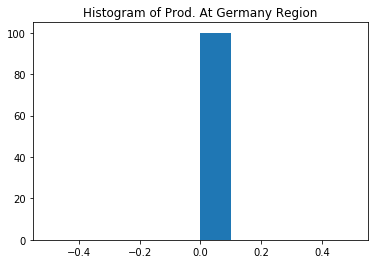

In [38]:
plt.title('Histogram of Prod. At Germany Region')

# Histogram of Germany production
plt.hist(df['Germany'])
plt.show()

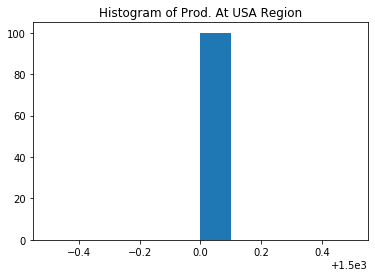

In [39]:
plt.title('Histogram of Prod. At USA Region')

# Histogram of Germany production
plt.hist(df['USA'])
plt.show()

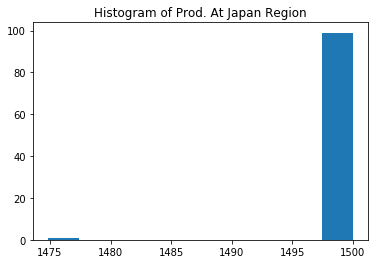

In [40]:
plt.title('Histogram of Prod. At Japan Region')

# Histogram of Germany production
plt.hist(df['Japan'])
plt.show()